# 타이타닉 생존자 예측

### 실습 개요
건조 당시 세계 최대의 여객선이었지만,1912년의 최초이자 최후의 항해 때 빙산과 충돌해 침몰한 비운의 여객선. 아마도 세상에서 가장 유명한 여객선이자 침몰선일 것입니다.

침몰한 지 100년이 넘었지만 아직까지 세계에서 가장 유명한 침몰선입니다.

사망자 수는 1위는 아니지만, 세계적으로 유명한 영화의 영향도 있고, 당시 최첨단 기술에 대해 기대감이 컸던 사회에 큰 영향을 끼치기도 한데다가, 근대 사회에서 들어서자마자 얼마 안된, 그리고 유명인사들도 희생된 대참사이기 때문에 가장 유명한 침몰선이 되었습니다. 또한 이 사건을 기점으로 여러가지 안전 조약들이 생겨났으니 더더욱 그렇습니다.

#### 데이터 설명
   - survived : 생존=1, 사망=0
   - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
   - sex : 성별
   - age: 나이
   - sibsp : 함께 탑승한 형제 또는 배우자 수
   - parch : 함께 탑승한 부모 또는 자녀 수
   - fare : 요금
   - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown
   - Deck: 선실 번호 (Cabin)

### 파일 읽기


In [ ]:
# 데이터 다운로드
import gdown
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

url = 'https://drive.google.com/uc?id=1ggE0u-sxn3MK4OWgIU4xmRovm8NA6ARU'
gdown.download(url, 'titanic.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ggE0u-sxn3MK4OWgIU4xmRovm8NA6ARU
To: /content/titanic.csv
100%|██████████| 24.3k/24.3k [00:00<00:00, 34.3MB/s]


'titanic.csv'

In [ ]:
# 그대로 실행하세요.
df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


### 데이터 확인
 - 데이터의 정보를 조회하세요.

In [ ]:
# 코드 입력


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


### 결측치 처리
 - 각 열 별 na 개수를 조회하세요.

In [ ]:
# 코드 입력


survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

 - 결측치를 아래 값으로 대체하세요.
   - age -> age의 평균,
   - deck -> 'N', 
   - embarked -> embarked 최빈값(mode)

In [ ]:
# 코드 입력
# fillna 함수를 이용하면 됩니다.
# 최빈값(mode)은 출력 결과가 series이므로 첫 번째 값을 꼭 인덱싱하여 선택해야 합니다.
# 예) df[열] = df[열].fillna(df[열].mode()[0])
df['age'] =
df['deck'] = 
df['embarked'] = 
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.000000,1,0,7.2500,S,N
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,N
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,N
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,N
887,1,1,female,19.000000,0,0,30.0000,S,B
888,0,3,female,29.699118,1,2,23.4500,S,N
889,1,1,male,26.000000,0,0,30.0000,C,C


 - 마지막으로 na 개수를 다시 조회하세요.

In [ ]:
# 코드 입력


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
deck        0
dtype: int64

### 데이터 분석

#### 성, 등급, 승선지에 따른 생존자에 대해 분석합니다.

 - 먼저 성, 등급 및 승선지의 분포를 확인합니다.

In [ ]:
# sex의 클래스 별 데이터 수를 출력하세요.
# value_counts를 이용하면 됩니다.
# 코드 입력


female    314
male      577
Name: sex, dtype: int64

In [ ]:
# pclass의 클래스 별 데이터 수를 출력하세요.
# 코드 입력


1    216
2    184
3    491
Name: pclass, dtype: int64

In [ ]:
# embarked의 클래스 별 데이터 수를 출력하세요.
# 코드 입력


C    168
Q     77
S    646
Name: embarked, dtype: int64

 - 세 데이터 모두 각 클래스별 데이터 수가 부족하지 않으니 분석을 시작합니다.

 - 성별 생존자의 비율(생존 확률)을 출력한 후 바 차트로 시각화하세요.

In [ ]:
# sex로 그룹화한 후 survived의 평균을 출력합니다.
# 코드 입력


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

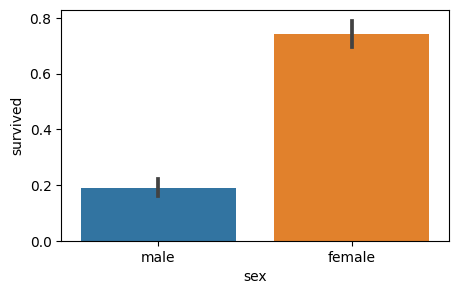

In [ ]:
# seaborn barplot이나 pandas plot(kind='bar')를 이용하세요.
# 코드 입력


 - 등급 생존자의 비율(생존 확률)을 출력한 후 시각화하세요.

In [ ]:
# pclass로 그룹화한 후 survived의 평균을 출력합니다.
# 코드 입력


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

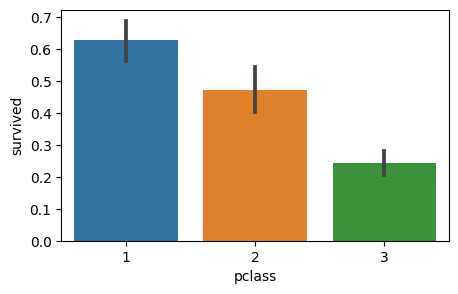

In [ ]:
# seaborn barplot이나 pandas plot(kind='bar')를 이용하세요.
# 코드 입력


 - 승선지별 생존자의 비율(생존 확률)을 출력한 후 시각화하세요.

In [ ]:
# embarked로 그룹화한 후 survived의 평균을 출력합니다.
# 코드 입력


embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64

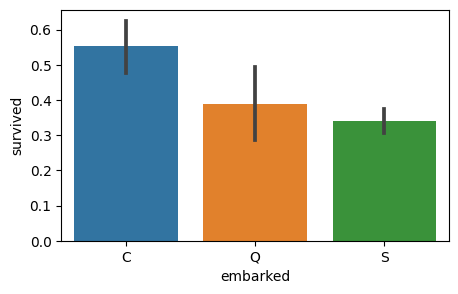

In [ ]:
# seaborn barplot이나 pandas plot(kind='bar')를 이용하세요.
# seaborn의 경우 order=['C', 'Q', 'S']를 설정하세요.
# 코드 입력


 - 성, 등급, 승선지에 따른 생존자의 비율(생존 확률)을 출력한 후 시각화하세요.

In [ ]:
# sex, pclass, embarked로 그룹화한 후 survived의 평균을 출력합니다.
# 코드 입력


sex     pclass  embarked
female  1       C           0.976744
                Q           1.000000
                S           0.960000
        2       C           1.000000
                Q           1.000000
                S           0.910448
        3       C           0.652174
                Q           0.727273
                S           0.375000
male    1       C           0.404762
                Q           0.000000
                S           0.354430
        2       C           0.200000
                Q           0.000000
                S           0.154639
        3       C           0.232558
                Q           0.076923
                S           0.128302
Name: survived, dtype: float64

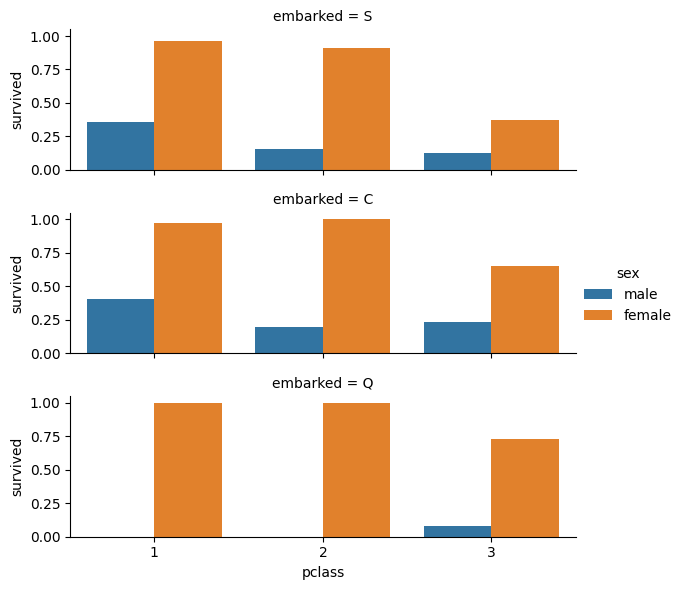

In [ ]:
# seaborn catplot을 이용하여 시각화합니다.
# x='pclass', y='survived', hue='sex', row='embarked'를 입력합니다. 
# kind='bar', data=df를 설정하여 바차트로 시각화합니다.
# 크기 조절을 위해 aspect=3, height=2로 설정합니다.
# ci=0으로 설정하여 신뢰구간 출력은 안합니다.
# 코드 입력


#### 연령 범주화
 - to_agecat 함수를 이용하여 age 열을 범주화하고 age_cat열에 저장하세요.
     - apply함수를 이용하세요.

In [ ]:
# to_agecat 함수입니다.
# 그대로 실행하세요.
def to_agecat(age):
    cat = ''
    if age<=-1:cat='Unknown'
    elif age<=5:cat='Baby'
    elif age<=12:cat='Child'
    elif age<=18:cat='Teenager'
    elif age<=25:cat='Student'
    elif age<=35:cat='Young Adult'
    elif age<=60:cat='Adult'
    else: cat='Elderly'
    return cat

In [ ]:
# to_agecat 함수를 이용하여 age 변수를 범주화하세요.
# apply함수의 사용법은 다음과 같습니다.
# df[열] = df[열].apply(함수)
# 코드 입력
df['age_cat'] = 
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_cat
0,0,3,male,22.000000,1,0,7.2500,S,N,Student
1,1,1,female,38.000000,1,0,71.2833,C,C,Adult
2,1,3,female,26.000000,0,0,7.9250,S,N,Young Adult
3,1,1,female,35.000000,1,0,53.1000,S,C,Young Adult
4,0,3,male,35.000000,0,0,8.0500,S,N,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,N,Young Adult
887,1,1,female,19.000000,0,0,30.0000,S,B,Student
888,0,3,female,29.699118,1,2,23.4500,S,N,Young Adult
889,1,1,male,26.000000,0,0,30.0000,C,C,Young Adult


 - 범주화된 연령과 성별 생존 비율을 바차트로 시각화하세요.

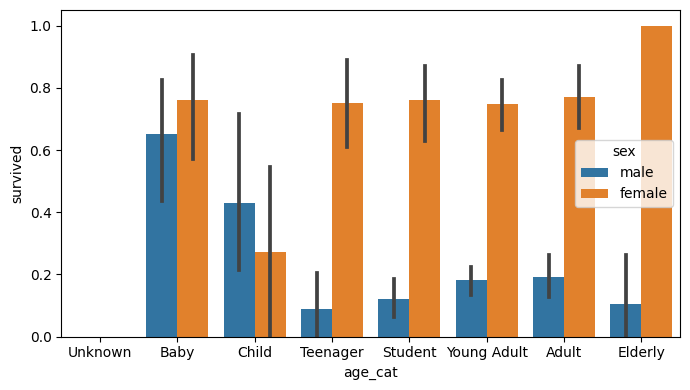

In [ ]:
# seaborn barplot을 이용합니다.
# x=age_cat, y=survived, hue='sex'로 설정합니다.
# order=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
# 코드 입력



 - 편차가 조금 크지만 여성은 노인을 제외한 나머지 구간이 비슷한 반면에 남성은 청소년부터 생존률이 급격하게 낮아지는 것을 확인할 수 있습니다. 

### 데이터 변환
 - df를 One-hot encoding을 이용하여 수치형으로 변환하여 df_vec에 저장하세요.
 

In [ ]:
# pd.get_dummies를 이용하면 됩니다.
# 코드 입력
df_vec = 
df_vec

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,...,deck_F,deck_G,deck_N,age_cat_Adult,age_cat_Baby,age_cat_Child,age_cat_Elderly,age_cat_Student,age_cat_Teenager,age_cat_Young Adult
0,0,3,22.000000,1,0,7.2500,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,38.000000,1,0,71.2833,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
888,0,3,29.699118,1,2,23.4500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### 데이터 재확인
 - df_vec의 정보를 출력하세요.

In [ ]:
# 모든 변수가 수치형이어야 합니다.
# 코드 입력


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   pclass               891 non-null    int64  
 2   age                  891 non-null    float64
 3   sibsp                891 non-null    int64  
 4   parch                891 non-null    int64  
 5   fare                 891 non-null    float64
 6   sex_female           891 non-null    uint8  
 7   sex_male             891 non-null    uint8  
 8   embarked_C           891 non-null    uint8  
 9   embarked_Q           891 non-null    uint8  
 10  embarked_S           891 non-null    uint8  
 11  deck_A               891 non-null    uint8  
 12  deck_B               891 non-null    uint8  
 13  deck_C               891 non-null    uint8  
 14  deck_D               891 non-null    uint8  
 15  deck_E               891 non-null    uin

- df_vec의 열 별 결측치를 조회하세요.

In [ ]:
# 결측치는 1개도 없어야 합니다.
# 코드 입력


survived               0
pclass                 0
age                    0
sibsp                  0
parch                  0
fare                   0
sex_female             0
sex_male               0
embarked_C             0
embarked_Q             0
embarked_S             0
deck_A                 0
deck_B                 0
deck_C                 0
deck_D                 0
deck_E                 0
deck_F                 0
deck_G                 0
deck_N                 0
age_cat_Adult          0
age_cat_Baby           0
age_cat_Child          0
age_cat_Elderly        0
age_cat_Student        0
age_cat_Teenager       0
age_cat_Young Adult    0
dtype: int64

### 학습 데이터 준비
 - df_vec을 X와 Y로 분리하세요.
   - X: 'Survived'를 제외한 모든 열
   - Y: 'Survived'

In [ ]:
# 코드 입력
X = 
Y = 

In [ ]:
# 분리한 X, Y 데이터 5줄씩 출력
display(X.head())
display(Y.head())

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,...,deck_F,deck_G,deck_N,age_cat_Adult,age_cat_Baby,age_cat_Child,age_cat_Elderly,age_cat_Student,age_cat_Teenager,age_cat_Young Adult
0,3,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

### RandomForestClassifer를 이용한 모델링

In [ ]:
# 필수 모델 추가
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 데이터 분할
 - X, Y를 trainset과 testset으로 분할하세요.
 - 분할 비율은 train 75 : test 25입니다.
 - random_state = 0
 - 분할 후 각 배열의 shape을 출력하세요.

In [ ]:
# 코드 입력
x_train, x_test, y_train, y_test = 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((668, 25), (223, 25), (668,), (223,))

 - RandomForestClassifier 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 Accuracy를 각각 출력하세요.
 - random_state=0
 - 결과가 잘 나오도록 max_depth를 조절해보세요.

In [ ]:
# 코드 입력
# 모델 생성 및 초기화
model = 

# 모델 학습

# 예측값 생성
pred_train =
pred_test = 

# Accuracy 측정
acc_train = 
acc_test = 

# 출력
print(f'Train Accuracy: {acc_train:.4}')
print(f'Test Accuracy: {acc_test:.4}')

Train Accuracy: 0.9865
Test Accuracy: 0.8475
